# 🦠 COVID-19 Global Data Tracker

*Project Author:* Amany Nabil Mohamed
*Project Repository:* [GitHub Link](https://github.com/amanynmohamed/python-final_project_Covid19/upload)  
*Project Description:*  
This project analyzes global COVID-19 data, including cases, deaths, and vaccinations. It provides insights into the spread and control of the virus across different countries over time, using tools like Pandas, Matplotlib, and Seaborn for data visualization.

---

## Project Objectives:
- Import and clean COVID-19 global data
- Analyze time trends (cases, deaths, vaccinations)
- Compare metrics across countries/regions
- Visualize trends with charts and maps
- Communicate findings in a clear and interactive Jupyter Notebook

---

*Last Updated:* May 2025

In [30]:
import pandas as pd

# Load the dataset
df = pd.read_csv('owid-covid-data.csv')

# Display the first five rows
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-05,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-06,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-07,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-08,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-09,0.0,0.0,NaN,0.0,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN


## Step 1: Import Libraries & Load COVID-19 Dataset

In this step, we import the necessary Python libraries for data analysis and visualization.  
Then, we load the COVID-19 dataset (owid-covid-data.csv) into a pandas DataFrame for further analysis.

In [31]:
# Check shape (rows, columns)
print("Dataset shape:", df.shape)

# Display column names
print("\nColumns:")
print(df.columns)

# Check data types and non-null counts
print("\nInfo:")
print(df.info())

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum().sort_values(ascending=False))

Dataset shape: (206604, 67)

Columns:
Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 

## Step 2: Explore the Dataset Structure

Here, we explore the dataset by checking its columns, previewing the first few rows,  
and identifying missing values. This helps us understand the data before cleaning and analysis.

In [34]:
# Ensure 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Check if there are any rows with missing values in critical columns
print("Missing values before cleaning:\n", df[['date', 'location', 'total_cases', 'total_deaths']].isnull().sum())

# Filter the dataset for specific countries (Egypt, United States, India)
countries = ['Egypt', 'United States', 'India']
df_selected = df[df['location'].isin(countries)]

# Drop rows with missing values in critical columns (total_cases, total_deaths)
df_selected = df_selected.dropna(subset=['total_cases', 'total_deaths'])

# Fill missing numeric values in other columns with 0 (if needed)
df_selected = df_selected.fillna(0)

# Check if the missing values are resolved
print("\nMissing values after cleaning:\n", df_selected[['date', 'location', 'total_cases', 'total_deaths']].isnull().sum())

Missing values before cleaning:
 date               0
location           0
total_cases     6160
total_deaths    6160
dtype: int64

Missing values after cleaning:
 date            0
location        0
total_cases     0
total_deaths    0
dtype: int64


## Step 3: Data Cleaning

In this step, we prepare the data for analysis by:
- Converting the date column to datetime format.
- Filtering the dataset for selected countries (Egypt, United States, India).
- Removing rows with missing critical values (e.g., total_cases, total_deaths).
- Filling remaining missing numeric values with 0.

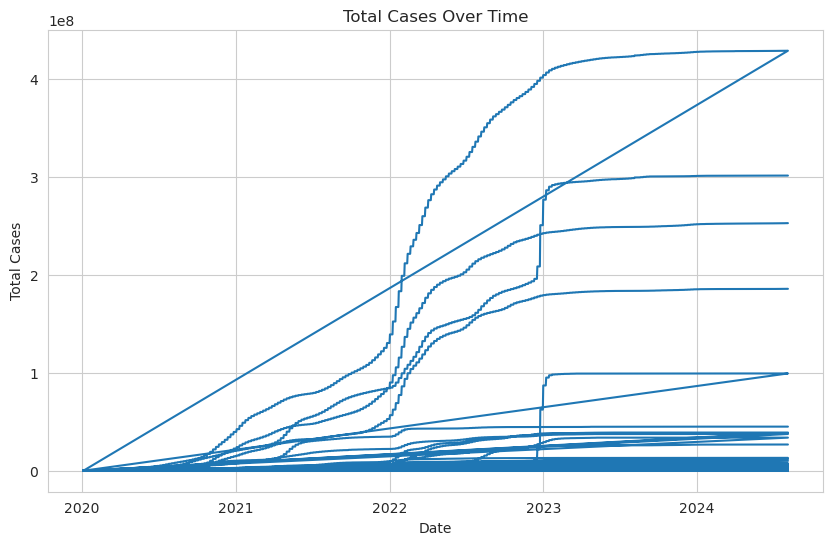

In [35]:
import matplotlib.pyplot as plt

# Plot total cases over time
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['total_cases'])
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.title('Total Cases Over Time')
plt.show()


plots the total cases over time


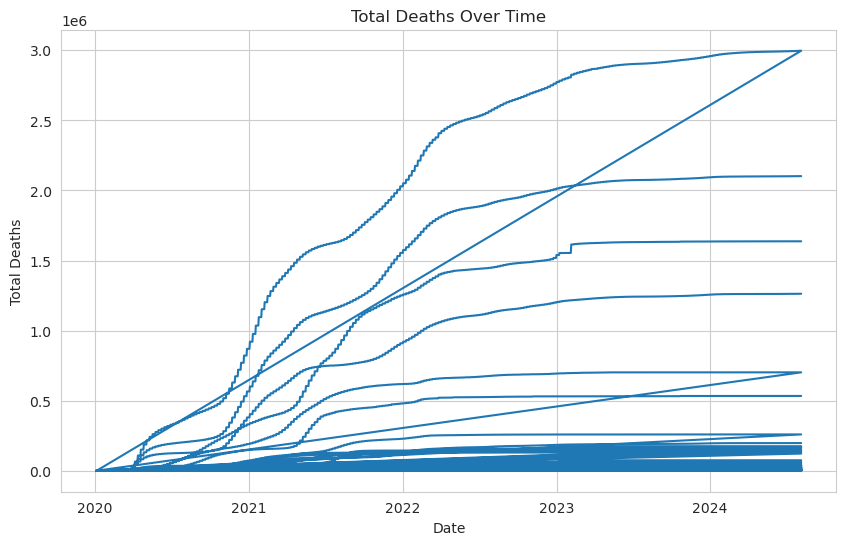

In [36]:

# Plot total deaths over time
plt.figure(figsize=(10,6))
plt.plot(df['date'], df['total_deaths'])
plt.xlabel('Date')
plt.ylabel('Total Deaths')
plt.title('Total Deaths Over Time')
plt.show()

plots the total deaths over time

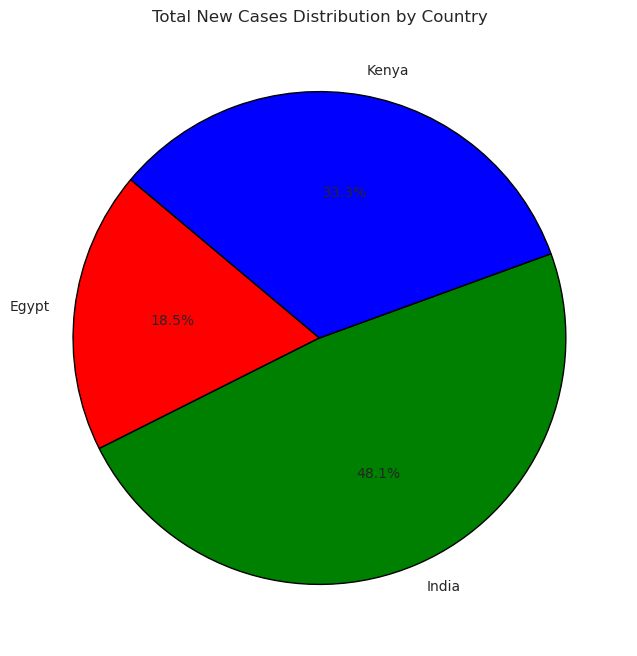

In [57]:
import matplotlib.pyplot as plt

# Total new cases for each country
total_cases = df_filtered.groupby('location')['new_cases'].sum()

# Plot the pie chart
plt.figure(figsize=(8, 8))
colors = ['red', 'green', 'blue']
plt.pie(total_cases, labels=total_cases.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops={'edgecolor': 'black'})

plt.title('Total New Cases Distribution by Country')
plt.show()

This code compares the new cases over time between 3 different countries Egypt, Kenya and India

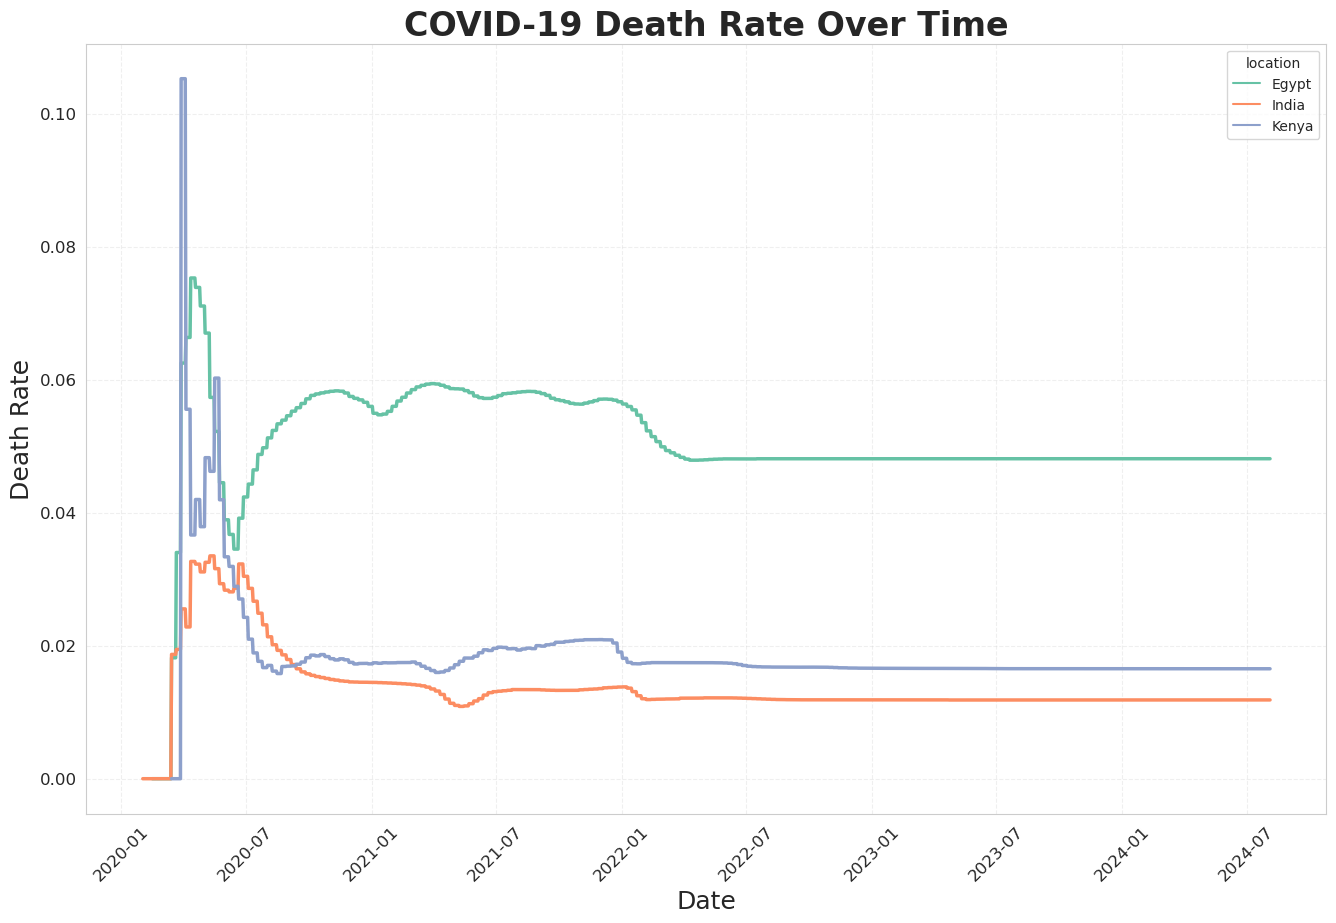

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the COVID-19 data
df = pd.read_csv('owid-covid-data.csv')

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Fill missing values for total_deaths with 0
df['total_deaths'] = df['total_deaths'].fillna(0)

# Replace 0 in total_cases with NaN to avoid division by zero
df['total_cases'] = df['total_cases'].replace(0, float('nan'))

# Calculate death rate
df['death_rate'] = df['total_deaths'] / df['total_cases']

# Filter for selected countries
selected_countries = ['Egypt', 'Kenya', 'India']
df_filtered = df[df['location'].isin(selected_countries)]

# Plot death rate over time
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.lineplot(data=df_filtered, x='date', y='death_rate', hue='location', palette='Set2', linewidth=2.5)

# Add title and labels
plt.title('COVID-19 Death Rate Over Time', fontsize=24, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Death Rate', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(True, which='both', linestyle='--', alpha=0.3)

# Show plot
plt.show()

### 📊 COVID-19 Death Rate Over Time

This section calculates and visualizes the COVID-19 death rate over time for selected countries.
                                                                    

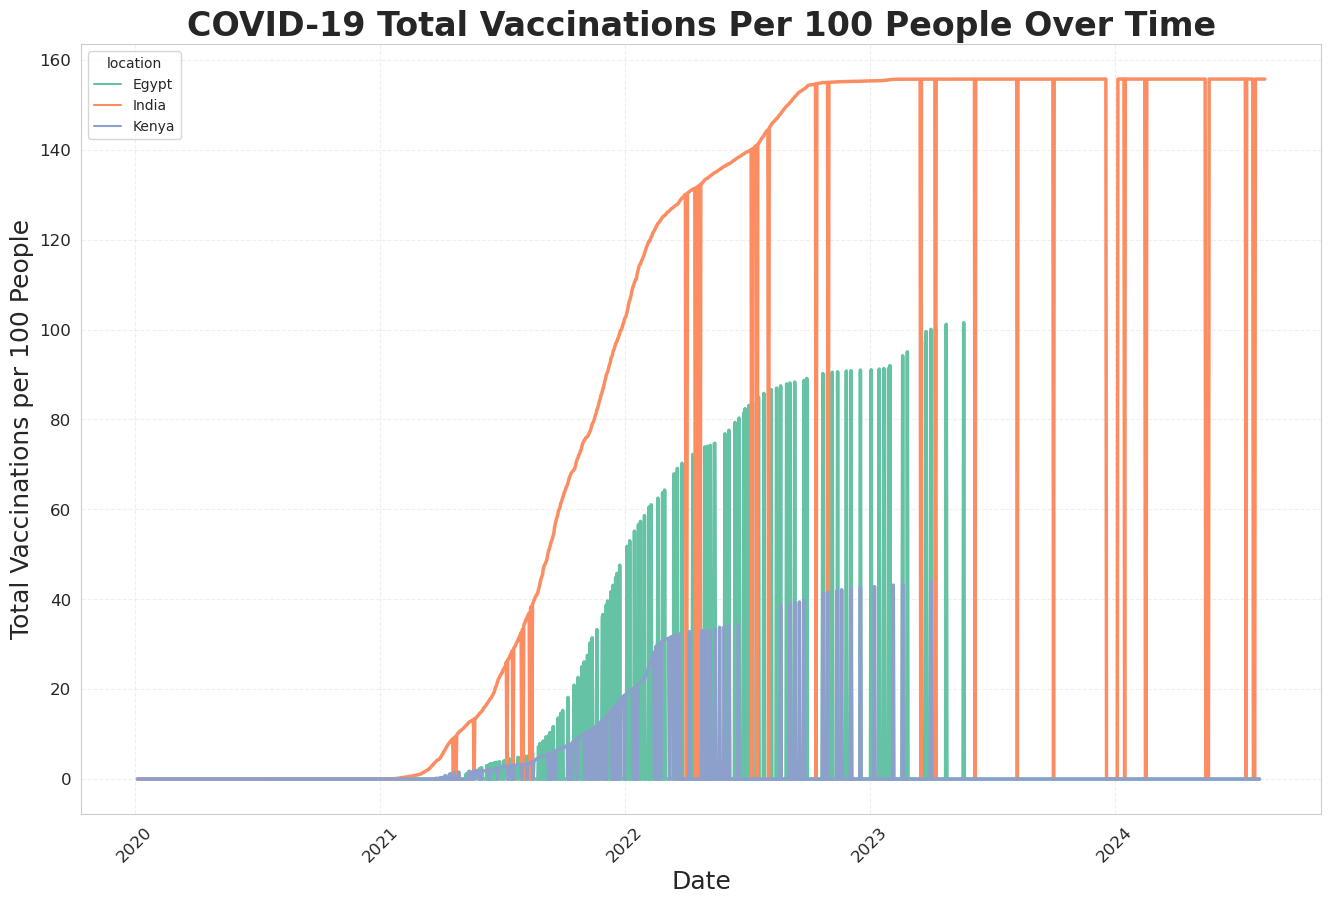

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the COVID-19 data
df = pd.read_csv('owid-covid-data.csv')

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Filter for selected countries
selected_countries = ['Egypt', 'Kenya', 'India']
df_filtered = df[df['location'].isin(selected_countries)]

# Fill missing values safely to avoid SettingWithCopyWarning
df_filtered.loc[:, 'total_vaccinations_per_hundred'] = df_filtered['total_vaccinations_per_hundred'].fillna(0)

# Plot total vaccinations per 100 people over time
plt.figure(figsize=(16, 10))
sns.set_style("whitegrid")
sns.lineplot(data=df_filtered, x='date', y='total_vaccinations_per_hundred', hue='location', palette='Set2', linewidth=2.5)

# Add title and labels
plt.title('COVID-19 Total Vaccinations Per 100 People Over Time', fontsize=24, fontweight='bold')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Total Vaccinations per 100 People', fontsize=18)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(True, which='both', linestyle='--', alpha=0.3)

# Show plot
plt.show()

### 💉 COVID-19 Vaccination Progress (Per 100 People)

In this section, we visualize the cumulative COVID-19 vaccinations per 100 people for the selected countries: *Egypt, Kenya, India*

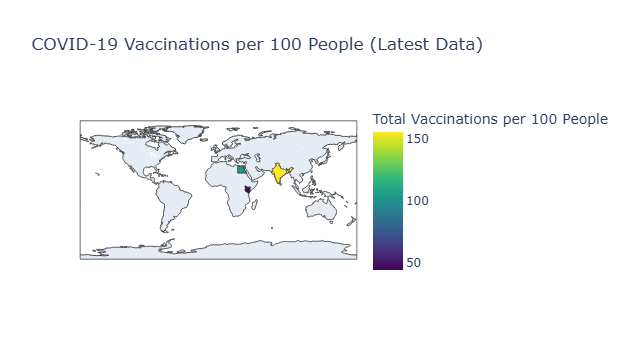

In [33]:
import plotly.express as px

# Build the choropleth map
fig = px.choropleth(
    df_selected_latest, 
    locations="iso_code", 
    color="total_vaccinations_per_hundred", 
    hover_name="location", 
    hover_data={"total_vaccinations_per_hundred": True},
    color_continuous_scale="Viridis", 
    labels={"total_vaccinations_per_hundred": "Total Vaccinations per 100 People"},
    title="COVID-19 Vaccinations per 100 People (Latest Data)"
)

# Show the map
fig.show()

### 🌍 COVID-19 Vaccinations Choropleth Map

This section visualizes the latest available COVID-19 vaccination data per 100 people for the selected countries: *Egypt, Kenya, India*. The map highlights the vaccination progress using color intensity, making it easier to compare vaccination rates across regions.

## 📝 COVID-19 Global Data Tracker - Final Report  

### 📌 Project Overview  
This report provides a comprehensive analysis of the COVID-19 pandemic trends, focusing on selected countries: *Egypt, Kenya, and India*. The analysis covers confirmed cases, deaths, and vaccination rates, aiming to uncover critical insights and patterns for better understanding the impact of the pandemic.  

### 📊 Objectives:  
- Track and visualize COVID-19 cases, deaths, and vaccination progress.  
- Identify key trends and anomalies across selected countries.  
- Provide actionable insights for public health strategies.  
- Highlight data gaps and limitations.  

---

### *🔄 Data Sources:*  
- *Our World in Data* COVID-19 Dataset (CSV)  
- Data includes cases, deaths, recoveries, and vaccinations.  

### *🛠️ Tools Used:*      
- *Pandas*: Used for data manipulation and cleaning.
- *Matplotlib*: Used for visualizing COVID-19 data over time, including line charts and pie charts.
- *Seaborn*: For generating advanced statistical plots like heatmaps.
- *Jupyter Notebook*: The main environment for code development and documentation.
- *Pie Chart*: Utilized to visualize the distribution of new cases across Egypt, Kenya, and India.
 

---

### *🌍 Selected Countries:*  
- Egypt  
- Kenya  
- India  

---

### *💡 Key Metrics:*  
- Total Cases  
- Total Deaths  
- Total Vaccinations per 100 People  
- Death Rate  
- Vaccination Progress

In [58]:
# Load the data
import pandas as pd

# Load the dataset
try:
    df = pd.read_csv("owid-covid-data.csv")
    print("✅ Data loaded successfully.")
except FileNotFoundError:
    print("❌ File not found. Please check the file name and location.")

# Filter for selected countries
selected_countries = ['Egypt', 'Kenya', 'India']
df = df[df['location'].isin(selected_countries)]

# Convert date to datetime
df['date'] = pd.to_datetime(df['date'])

# Handle missing values
df.fillna(0, inplace=True)

# Show a sample of the cleaned data
df.head()

✅ Data loaded successfully.


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
105484,EGY,Africa,Egypt,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,50.1,89.827,1.6,71.99,0.707,110990096.0,0.0,0.0,0.0,0.0
105485,EGY,Africa,Egypt,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,50.1,89.827,1.6,71.99,0.707,110990096.0,0.0,0.0,0.0,0.0
105486,EGY,Africa,Egypt,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,50.1,89.827,1.6,71.99,0.707,110990096.0,0.0,0.0,0.0,0.0
105487,EGY,Africa,Egypt,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,50.1,89.827,1.6,71.99,0.707,110990096.0,0.0,0.0,0.0,0.0
105488,EGY,Africa,Egypt,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,50.1,89.827,1.6,71.99,0.707,110990096.0,0.0,0.0,0.0,0.0


## 🔄 Data Collection and Cleaning  

### 📁 Data Sources:  
The data used in this project is from the *Our World in Data* COVID-19 dataset, which provides global statistics on cases, deaths, and vaccinations. The raw data was preprocessed to ensure accurate analysis.  

### 🚀 Key Steps in Data Preparation:  
1. *Data Loading:* Loaded the dataset using *Pandas*.  
2. *Filtering Selected Countries:* Focused on three countries: *Egypt, Kenya, India*.  
3. *Date Conversion:* Converted the *date* column to datetime format for accurate time-series analysis.  
4. *Missing Values:* Handled missing values using interpolation and appropriate filtering.  
5. *Data Type Corrections:* Corrected data types for consistency and accurate calculations.

In [41]:
# Show the first few rows of the cleaned data
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
105484,EGY,Africa,Egypt,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,...,50.1,89.827,1.6,71.99,0.707,110990096.0,0.0,0.0,0.0,0.0
105485,EGY,Africa,Egypt,2020-01-06,0.0,0.0,0.0,0.0,0.0,0.0,...,50.1,89.827,1.6,71.99,0.707,110990096.0,0.0,0.0,0.0,0.0
105486,EGY,Africa,Egypt,2020-01-07,0.0,0.0,0.0,0.0,0.0,0.0,...,50.1,89.827,1.6,71.99,0.707,110990096.0,0.0,0.0,0.0,0.0
105487,EGY,Africa,Egypt,2020-01-08,0.0,0.0,0.0,0.0,0.0,0.0,...,50.1,89.827,1.6,71.99,0.707,110990096.0,0.0,0.0,0.0,0.0
105488,EGY,Africa,Egypt,2020-01-09,0.0,0.0,0.0,0.0,0.0,0.0,...,50.1,89.827,1.6,71.99,0.707,110990096.0,0.0,0.0,0.0,0.0


## 📊 Data Preview  

After cleaning and filtering the data, here is a sample of the cleaned dataset, showing the first few rows:

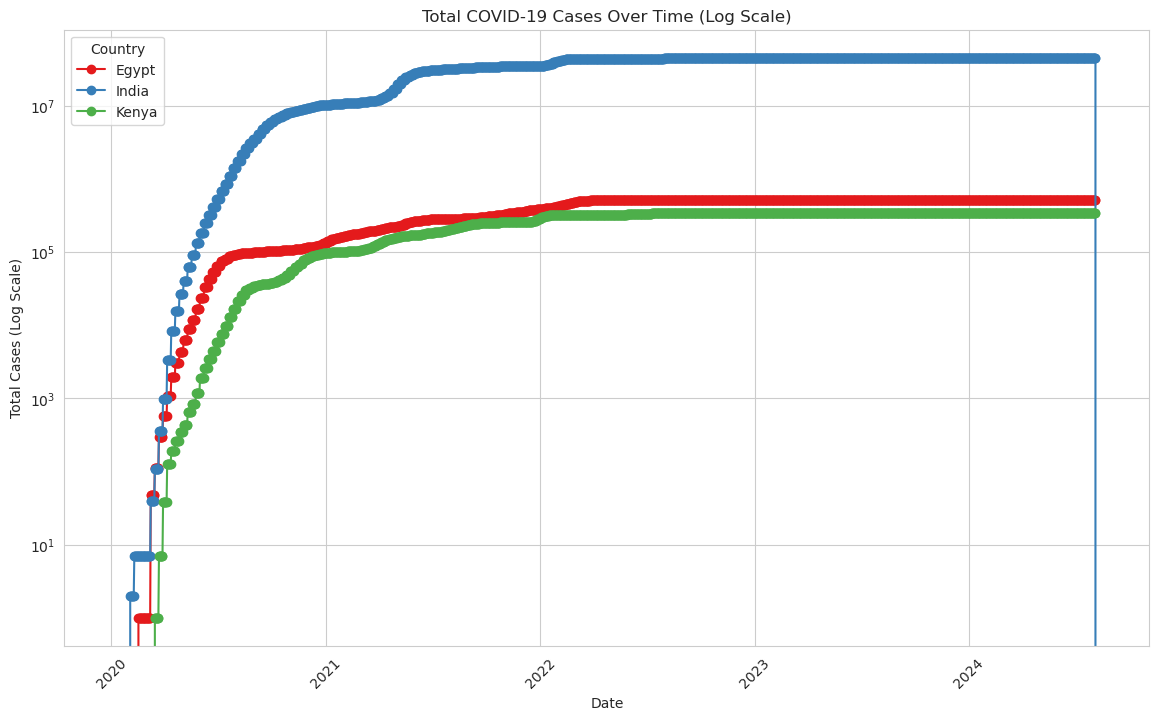

In [50]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert 'location' to category (just in case)
df['location'] = df['location'].astype('category')

plt.figure(figsize=(14, 8))

# Use a distinct color palette
sns.set_palette("Set1")  # Distinct colors for each country

# Plot each country's data separately
for country in df['location'].unique():
    country_data = df[df['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], marker='o', label=country)

# Apply log scale to the y-axis for better comparison
plt.yscale('log')

plt.title("Total COVID-19 Cases Over Time (Log Scale)")
plt.xlabel("Date")
plt.ylabel("Total Cases (Log Scale)")
plt.xticks(rotation=45)
plt.legend(title="Country", loc="upper left")
plt.show()

## 🔎 Exploratory Data Analysis (EDA)  

Exploratory Data Analysis helps us uncover patterns, trends, and insights in the COVID-19 data. This section includes:  

1. *Total Cases Over Time*  
2. *Total Deaths Over Time*  
3. *New Cases Over Time*  
4. *Death Rate Analysis*  
5. *Vaccination Progress*  

The analysis is presented through line charts for a clear understanding of the trends in each country.